In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#ran into depricated seaborn model and sklearn model. Found up to date versions

df = pd.read_csv("../../DeathRate.csv")

print("Available Countries:")
for index, country in enumerate(df['Country Name'].unique(), 1):
    print(f"{index}. {country}") # Prints the list of countries with a number for each country

selection = int(input("Enter the number of your choice: ")) # Prompts the user to select a country
chosen_country = df['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = df.loc[df['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array



Available Countries:
1. Aruba
2. Africa Eastern and Southern
3. Afghanistan
4. Africa Western and Central
5. Angola
6. Albania
7. Andorra
8. Arab World
9. United Arab Emirates
10. Argentina
11. Armenia
12. American Samoa
13. Antigua and Barbuda
14. Australia
15. Austria
16. Azerbaijan
17. Burundi
18. Belgium
19. Benin
20. Burkina Faso
21. Bangladesh
22. Bulgaria
23. Bahrain
24. Bahamas, The
25. Bosnia and Herzegovina
26. Belarus
27. Belize
28. Bermuda
29. Bolivia
30. Brazil
31. Barbados
32. Brunei Darussalam
33. Bhutan
34. Botswana
35. Central African Republic
36. Canada
37. Central Europe and the Baltics
38. Switzerland
39. Channel Islands
40. Chile
41. China
42. Cote d'Ivoire
43. Cameroon
44. Congo, Dem. Rep.
45. Congo, Rep.
46. Colombia
47. Comoros
48. Cabo Verde
49. Costa Rica
50. Caribbean small states
51. Cuba
52. Curacao
53. Cayman Islands
54. Cyprus
55. Czechia
56. Germany
57. Djibouti
58. Dominica
59. Denmark
60. Dominican Republic
61. Algeria
62. East Asia & Pacific (excludin

Text(0.5, 1.0, "Nauru's Life Expectancy Over Time")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

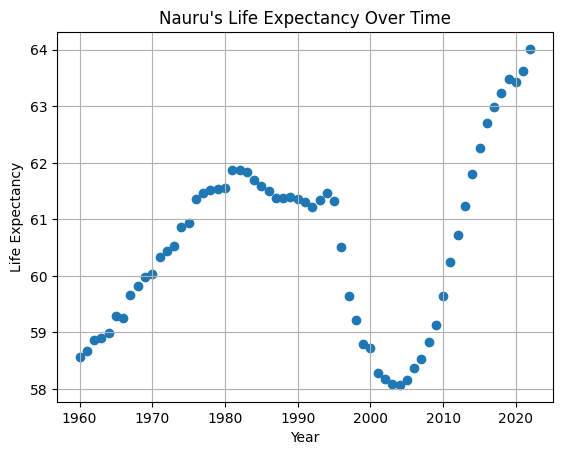

In [44]:
plt.scatter(x, y)
plt.title(chosen_country + "'s Life Expectancy Over Time")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)


LinearRegression()

Text(0.5, 1.0, "Nauru's Life Expectancy Over Time")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

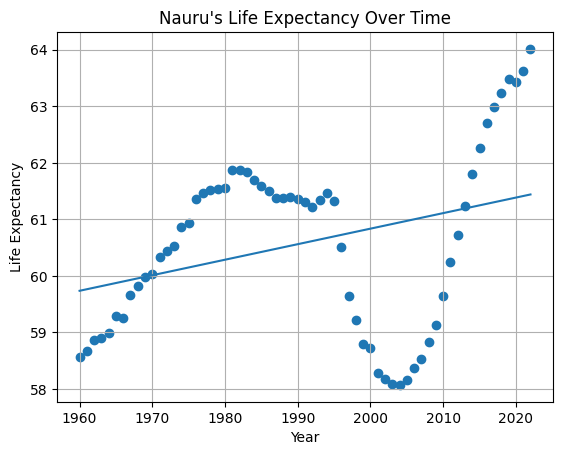

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x, y) 
y_pred = model.predict(x)

# Plot regression line
plt.scatter(x, y)
plt.title(chosen_country + "'s Life Expectancy Over Time")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.plot(x, y_pred)

In [46]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [0.02747254]
Model intercept: [5.89061284]


In [47]:

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

LinearRegression()

0.5000000000000033
[ 1.5 -2.   1. ]


In [48]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [49]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())